In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from kd_smoother import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 166.11 %
MDD: 22.94 %
MDD Duration 101 days 07:00:00
worst trade: -14.57 %
2022-11-07 18:45:00 ~ 2022-11-08 05:30:00
avg holding days: 1.36 days
--------------------------------------------
PF: 2.01
Sharpe Ratio: 2.09
Calmar Ratio: 6.30
Sortino Ratio: 3.16
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 1.59 %
Total Time Exposure : 39.03 %
Total Trades: 132
Win Rate: 47.73 %
--------------------------------------------
PF * Win Rate: 0.959


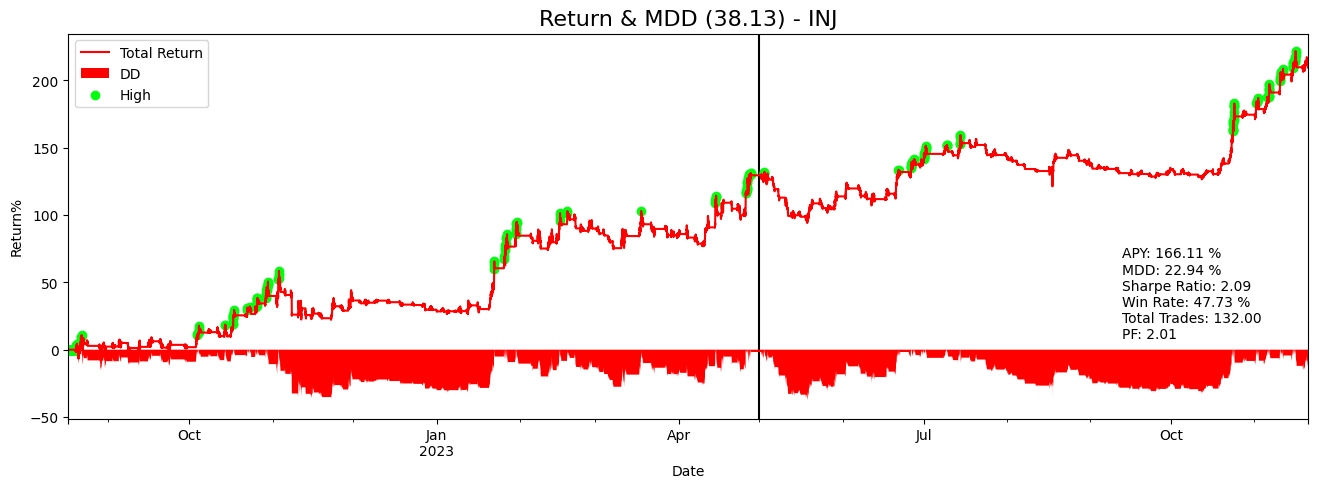

(None,
 Start                               2022-08-17 02:45:00
 End                                 2023-11-21 01:00:00
 Period                                460 days 22:30:00
 Start Value                                     10000.0
 Min Value                                   9346.593612
 Max Value                                     32181.685
 End Value                                  30934.035818
 Total Return [%]                             209.340358
 Benchmark Return [%]                         647.901119
 Total Time Exposure [%]                       39.032768
 Max Gross Exposure [%]                            100.0
 Max Drawdown [%]                              22.936356
 Max Drawdown Duration                 101 days 07:00:00
 Total Orders                                        264
 Total Fees Paid                              798.517967
 Total Trades                                        132
 Win Rate [%]                                  47.727273
 Best Trade [%]         

In [127]:
start = '2022-01-01'
sep = ''
end = ''

side = 'long'

params = {'window_k': 72, 'window_d': 132}

config = {'freq':'15T', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'INJ'

# 15min : INJ{'window_k': 72, 'window_d': 132}long
# 15min : INJ{'window_k': 236, 'window_d': 120}long
# 1h : INJ{'window_k': 88, 'window_d': 72}long
# 1h : INJ{'window_k': 90, 'window_d': 64}long
# 4h : INJ{'window_k': 28, 'window_d': 28}long
# 4h : INJ{'window_k': 4, 'window_d': 32}both


df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_trades_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

### 多參數

In [118]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2022-05-01'

symbol_list = ['RUNE'] #,'XRP']
sample_sets = [[start,end]]
freq = '15T'
config = {'freq':freq,'fee': 0.0003,'weekend_filter':False}

params = {'window_k': [4,200,4], 
          'window_d': [4,200,4]}


multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    df_dict=df_dict,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='L/S')
trades, value_df = multi_test.multi_params_result(all_params)
print(f'-------------------{freq} is done----------------------')

======================= RUNE L/S Optimize Test =======================

---------- RUNE Long ----------
Optimization trails: 2401


100%|██████████| 2401/2401 [01:01<00:00, 38.98it/s]


Optimization time: 61.91 sec
{'window_k': 16, 'window_d': 40}

---------- RUNE Short ----------
Optimization trails: 2401


100%|██████████| 2401/2401 [01:01<00:00, 38.73it/s]


Optimization time: 62.53 sec
{'window_k': 180, 'window_d': 16}
-------- RUNE L/S --------
+------------+-----------+---------+-----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |      毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+-----------+------------+---------+------------|
| 2022-03    |    222.55 | 46070.6 | -24174.1  |       1.91 |   46.19 |        210 |
| 2022-06    |     52.27 | 14502.4 |  -9275.56 |       1.56 |   40.54 |         74 |
+------------+-----------+---------+-----------+------------+---------+------------+
-------------------15T is done----------------------
